In [7]:
#!/usr/bin/env python3
# initialization
%reset -f 
import importlib
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import transpile

# import basic plot tools
import matplotlib.pyplot as plt
import utilitiesRepetitionCode as utl
import qiskit
import utilities as commonUtl
importlib.reload(commonUtl)
importlib.reload(utl)

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True # For latex plots
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'font.family': "Times"})

p1_err=1e-3
p2_err=1e-2
p3_err=1e-2

basis1 = ["h", "s", "sdg", "cx", "t", "cxx"]
basis2 = ["cx", "id", "rz", "sx", "x"]


In [8]:
encoding_reps=list(range(1, 7)) #1 rep means no encoding
raw_counts_stab_meas=[]
raw_counts_direct_meas=[]
raw_counts_dsm=[]
SHOTS=10000
# err_val=1e-02
gate_rep=21 #Cnot repetition amount. The circuit is just repeated cnots
# Unencoded circ in the Clifford+T basis.
circ = transpile(utl.testcirc_cx_111init(gate_rep), basis_gates=basis2, optimization_level=0)
print(circ)
correct_answer = commonUtl.to_percentages(commonUtl.keys_to_binary(
    commonUtl.execute_circ_no_depol(circ, SHOTS)))

# Not encoded results and append them.
not_encoded_result = commonUtl.keys_to_binary(commonUtl.to_percentages(commonUtl.execute_circ_with_depol(circ, p1_err, SHOTS)))
raw_counts_stab_meas.append(not_encoded_result)
raw_counts_direct_meas.append(not_encoded_result)
raw_counts_dsm.append(not_encoded_result)

for encoding_rep in encoding_reps[1:]: # We skip the first value because that's not encoded.
    # We ran 1 rep above.

    # Encoded circ
    coded_circ_stab_meas = utl.Encodings.to_encoded_circ_IBMBasis_depol_stab_meas(circ, encoding_rep, p1_err, p2_err, p3_err)
    coded_circ_direct_meas= utl.Encodings.to_encoded_circ_IBMBasis(circ, encoding_rep)
    coded_circ_dsm=utl.Encodings.to_encoded_circ_IBMBasis_dsm(circ, encoding_rep)

    # Raw counts
    counts_stab_meas=commonUtl.execute_circ_no_depol(coded_circ_stab_meas, SHOTS) # the circuits already have depol noise. This is done to make the 
                                                                                # cat states for measuring have ideal initialization to mimic offline prep.
    counts_direct_meas=commonUtl.execute_circ_with_depol(coded_circ_direct_meas, p1_err, SHOTS)
    counts_dsm=commonUtl.execute_circ_with_depol(coded_circ_dsm, p1_err, SHOTS)

    raw_counts_stab_meas.append(counts_stab_meas)
    raw_counts_direct_meas.append(counts_direct_meas)
    raw_counts_dsm.append(counts_dsm)

    print(circ)
    print(coded_circ_stab_meas)


        ┌───┐                                                                 »
   q_0: ┤ X ├──■─────────■─────────■─────────■─────────■─────────■─────────■──»
        ├───┤┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐»
   q_1: ┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├»
        ├───┤└───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘»
   q_2: ┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─────»
        └───┘     └───┘     └───┘     └───┘     └───┘     └───┘     └───┘     »
meas: 3/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                                                                              »
«   q_0: ───────■─────────■─────────■─────────■─────────■─────────■─────────■──»
«             ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐»
«   q_1: ──■──┤ X ├──■──┤ X ├──■──┤ X

In [9]:
importlib.reload(utl)
print(len(encoding_reps))
print(len(raw_counts_direct_meas))

ssos_stab_meas = [] #SSO results
ssos_direct_meas = [] #SSO directly measure the encoded states and see if it lies in the code space.
ssos_dsm=[] # decode the state and then measure the ancillas to see if they are all zeros.
post_select_rates_stab_meas=[]
post_select_rates_direct_meas=[]
post_select_rates_dsm=[]
post_select_rates_stab_meas.append(sum(not_encoded_result.values()))
post_select_rates_direct_meas.append(sum(not_encoded_result.values()))
post_select_rates_dsm.append(sum(not_encoded_result.values()))

ssos_stab_meas.append(commonUtl.get_sso(correct_answer, not_encoded_result))
ssos_direct_meas.append(commonUtl.get_sso(correct_answer, not_encoded_result))
ssos_dsm.append(commonUtl.get_sso(correct_answer, not_encoded_result))
for idx, encoding_rep in enumerate(encoding_reps[1:]): 
    # We skip the first value because that's not encoded.
    # Post selected counts
    # print(raw_counts_stab_meas)
    # print(raw_counts_direct_meas)
    # print(raw_counts_dsm)
    post_select_counts_stab_meas=utl.post_select_stab_meas(raw_counts_stab_meas[idx+1], encoding_rep, logical_bases={"0"*encoding_rep: "0", "1"*encoding_rep: "1"})
    post_select_counts_direct_meas=utl.post_select(raw_counts_direct_meas[idx+1], encoding_rep, logical_bases={"0"*encoding_rep: "0", "1"*encoding_rep: "1"})
    post_select_counts_dsm=utl.post_select_dsm(raw_counts_dsm[idx+1], encoding_rep, )

    # Post selected dists
    post_select_dists_stab_meas = commonUtl.keys_to_binary(commonUtl.to_percentages(post_select_counts_stab_meas))
    post_select_dists_direct_meas = commonUtl.keys_to_binary(commonUtl.to_percentages(post_select_counts_direct_meas))
    post_select_dists_dsm=commonUtl.keys_to_binary(commonUtl.to_percentages(post_select_counts_dsm))

    # Post selected rates
    post_select_rates_stab_meas.append(sum(post_select_counts_stab_meas.values())/SHOTS)
    post_select_rates_direct_meas.append(sum(post_select_counts_direct_meas.values())/SHOTS)
    post_select_rates_dsm.append(sum(post_select_counts_dsm.values())/SHOTS)

    # Append sso values 
    ssos_stab_meas.append(commonUtl.get_sso(post_select_dists_stab_meas, correct_answer))
    ssos_direct_meas.append(commonUtl.get_sso(post_select_dists_direct_meas, correct_answer))
    ssos_dsm.append(commonUtl.get_sso(post_select_dists_dsm, correct_answer))

    print(f"post selected results distribution: {post_select_dists_stab_meas}")
    print(f"post selected runs: {post_select_counts_stab_meas.values()}")
    print(f"post selected rates: {post_select_rates_stab_meas}")

6
6
key:  ['001100', '101', '110011']
['00', '11', '00']
key:  ['010100', '011', '011011']
['01', '01', '00']
key:  ['000101', '101', '110100']
['00', '01', '01']
key:  ['000000', '101', '110011']
['00', '00', '00']
concat key:  101
key:  ['000001', '101', '110010']
['00', '00', '01']
key:  ['001100', '111', '111111']
['00', '11', '00']
key:  ['010000', '101', '100011']
['01', '00', '00']
key:  ['000110', '111', '111011']
['00', '01', '10']
key:  ['010000', '001', '010011']
['01', '00', '00']
key:  ['010001', '000', '010001']
['01', '00', '01']
key:  ['010000', '111', '101111']
['01', '00', '00']
key:  ['010101', '010', '011001']
['01', '01', '01']
key:  ['110000', '101', '110011']
['11', '00', '00']
key:  ['000110', '101', '110010']
['00', '01', '10']
key:  ['000100', '001', '000111']
['00', '01', '00']
key:  ['010001', '101', '100010']
['01', '00', '01']
key:  ['010110', '011', '011011']
['01', '01', '10']
key:  ['010001', '111', '101110']
['01', '00', '01']
key:  ['010000', '101', '

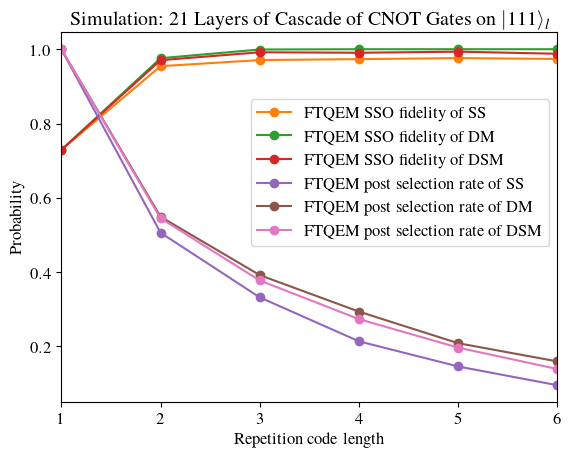

encoded sso: [0.7291, 0.9543568464730291, 0.9707919301415237, 0.9733395696913003, 0.9760438056125941, 0.9738493723849373]
post selection rate: [1.0, 0.5061, 0.3321, 0.2138, 0.1461, 0.0956]
correct: {'0b101': 1.0}


In [13]:
fig, ax = plt.subplots()
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([encoding_reps[0], encoding_reps[-1]])
plt.xticks(encoding_reps)
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.2e'))
plt.plot(encoding_reps, ssos_stab_meas, label=f"FTQEM SSO fidelity of SS", marker="o", color="C1")
plt.plot(encoding_reps, ssos_direct_meas, label=f"FTQEM SSO fidelity of DM", marker="o", color="C2")
plt.plot(encoding_reps, ssos_dsm, label=f"FTQEM SSO fidelity of DSM", marker="o", color="C3")
plt.plot(encoding_reps, post_select_rates_stab_meas, label=f"FTQEM post selection rate of SS", marker="o", color="C4")
plt.plot(encoding_reps, post_select_rates_direct_meas, label=f"FTQEM post selection rate of DM", marker="o", color="C5")
plt.plot(encoding_reps, post_select_rates_dsm, label=f"FTQEM post selection rate of DSM", marker="o", color="C6")


plt.ylabel('Probability')
plt.xlabel("Repetition code length")
plt.title(f"Simulation: {gate_rep} Layers of Cascade of CNOT Gates on " + r"$|111\rangle_l$")
plt.legend(bbox_to_anchor=(1, 0.4), loc='lower right')
plt.show()
print(f"encoded sso: {ssos_stab_meas}")
print(f"post selection rate: {post_select_rates_stab_meas}")
print(f"correct: {correct_answer}")


In [11]:
qiskit.__version__

'0.23.3'